<a href="https://colab.research.google.com/github/MileneCV/cluster_and_neural_network/blob/main/culster_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# Machine Learning imports 
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (make_column_selector, make_column_transformer)
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap
from sklearn import set_config
set_config(display='diagram')
#import imblearn pipeline
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, \
classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
 
#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# load data
drive.mount('/content/drive')
filename = '/content/drive/My Drive/flight_df - flight_df.csv'
df = pd.read_csv(filename)

Mounted at /content/drive


In [ ]:
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


In [ ]:
# copy
df_copy = df.copy()

In [ ]:
# check duplicates
df_copy.duplicated().sum()

0

In [ ]:
# check missing values
df_copy.isna().sum()

Age                                  0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Male                          0
Loyal Customer                       0
Business Travel                      0
satisfied                            0
dtype: int64

In [ ]:
# checking any inconsistent values
df_copy.describe(include= 'all')

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
# This for loop will check any inconsistent values in all columns
for col in df_copy:
    print(f'- {col}:')
    print(df_copy[col].value_counts())
    print("\n\n")

- Age:
39    551
25    504
40    502
42    497
44    478
     ... 
78      6
73      5
79      4
85      3
76      3
Name: Age, Length: 75, dtype: int64



- Class:
3    9560
1    9004
2    1436
Name: Class, dtype: int64



- Flight Distance:
337     144
404      88
2475     81
862      78
594      78
       ... 
1573      1
875       1
1963      1
3584      1
1515      1
Name: Flight Distance, Length: 3108, dtype: int64



- Inflight wifi service:
3    4992
2    4969
4    3778
1    3468
5    2213
0     580
Name: Inflight wifi service, dtype: int64



- Departure/Arrival time convenient:
4    4844
5    4348
3    3490
2    3265
1    3006
0    1047
Name: Departure/Arrival time convenient, dtype: int64



- Ease of Online booking:
3    4731
2    4637
4    3729
1    3399
5    2648
0     856
Name: Ease of Online booking, dtype: int64



- Gate location:
3    5547
4    4619
2    3733
1    3414
5    2686
0       1
Name: Gate location, dtype: int64



- Food and drink:
4    4691
5    4306
3   

In [ ]:
# fixing data types
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

In [ ]:
# all columns are integer but there are a lot columns that are categorical yes/no let's change to object to use ohe in machine learning part
df_copy[['Business Travel', 'Loyal Customer', 'Gender_Male', 'Class' ]] = df_copy[['Business Travel', 'Loyal Customer', 'Gender_Male', 'Class']].astype(str) 

# check again
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                20000 non-null  int64 
 1   Class                              20000 non-null  object
 2   Flight Distance                    20000 non-null  int64 
 3   Inflight wifi service              20000 non-null  int64 
 4   Departure/Arrival time convenient  20000 non-null  int64 
 5   Ease of Online booking             20000 non-null  int64 
 6   Gate location                      20000 non-null  int64 
 7   Food and drink                     20000 non-null  int64 
 8   Online boarding                    20000 non-null  int64 
 9   Seat comfort                       20000 non-null  int64 
 10  Inflight entertainment             20000 non-null  int64 
 11  On-board service                   20000 non-null  int64 
 12  Leg 

In [ ]:
# categorical columns yes/no
for col in df_copy.select_dtypes('object'):
  print(col, df[col].nunique())

Class 3
Gender_Male 2
Loyal Customer 2
Business Travel 2



 Age 



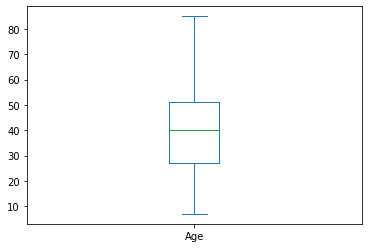


 Flight Distance 



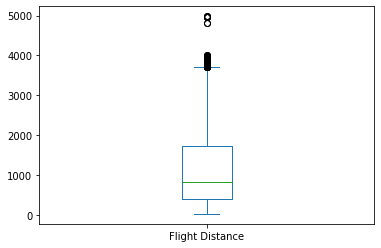


 Inflight wifi service 



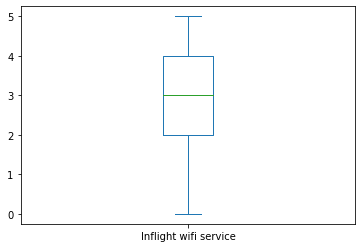


 Departure/Arrival time convenient 



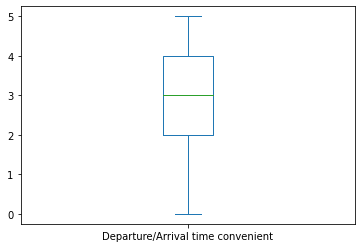


 Ease of Online booking 



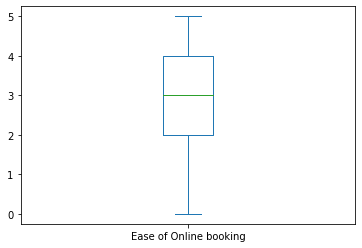


 Gate location 



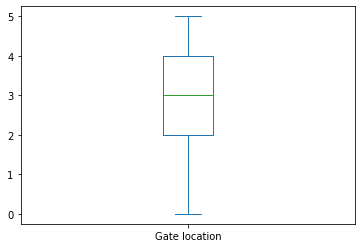


 Food and drink 



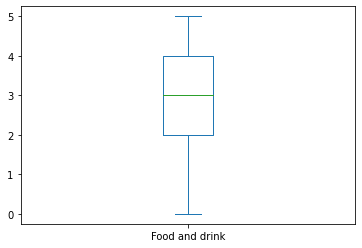


 Online boarding 



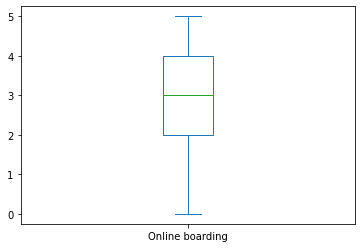


 Seat comfort 



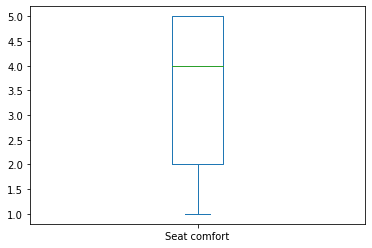


 Inflight entertainment 



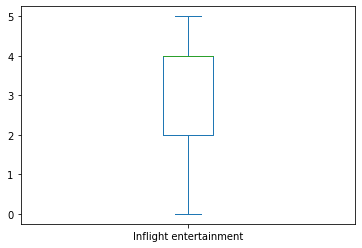


 On-board service 



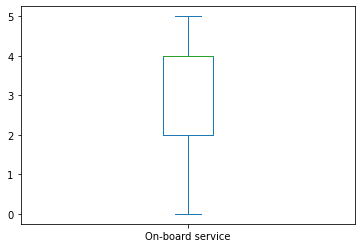


 Leg room service 



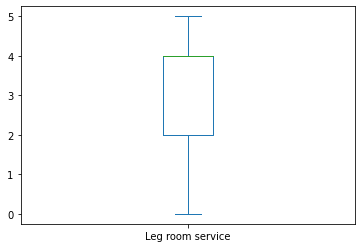


 Baggage handling 



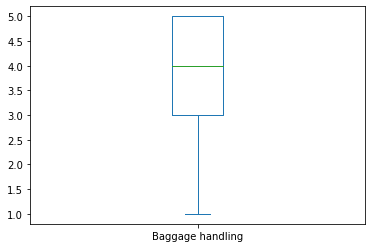


 Checkin service 



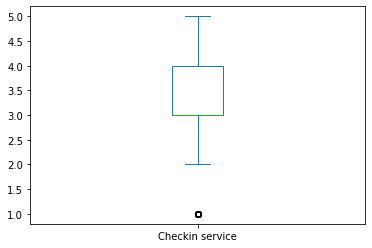


 Inflight service 



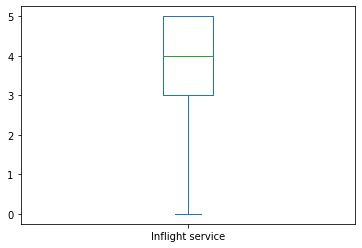


 Cleanliness 



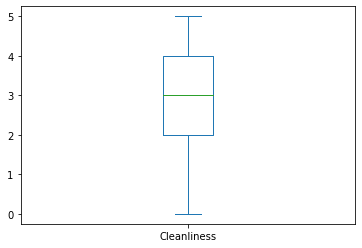


 Departure Delay in Minutes 



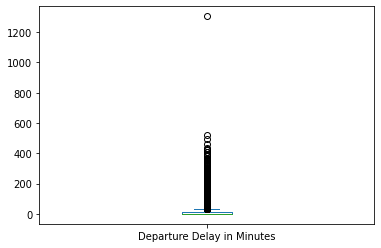


 Arrival Delay in Minutes 



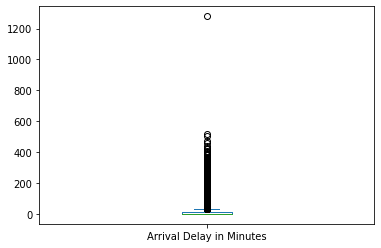


 satisfied 



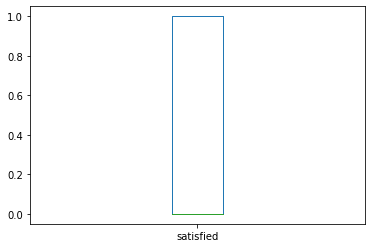

In [ ]:
# # explore numeric distributions
for col in df_copy.select_dtypes('number'):
  print('\n', col, '\n')
  df_copy[col].plot(kind='box')
  plt.show()

#4. Use a KMeans model to cluster the passengers into an optimal number of clusters.

In [ ]:
# make selector columns:
# numerical columns
num_selector = make_column_selector(dtype_include = 'number')
print('numeric columns')
print(num_selector(df_copy))

# categorical columns
cat_selector = make_column_selector(dtype_include = 'object')
print('categorical columns')
print(cat_selector(df_copy))

numeric columns
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfied']
categorical columns
['Class', 'Gender_Male', 'Loyal Customer', 'Business Travel']


In [ ]:
# instantiate an ohe for categorical columns
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
# instantiate scaler for numeric columns
scaler = StandardScaler()

In [ ]:
# make column transform 
preprocessor = make_column_transformer((scaler, num_selector ), (ohe, cat_selector ), remainder='passthrough')


In [ ]:
# fit and transform df
processed_df = preprocessor.fit_transform(df_copy)


In [ ]:
processed_df

array([[-0.89202959,  0.87248186, -0.54862899, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.82885333, -0.50798316,  1.71236004, ...,  1.        ,
         0.        ,  1.        ],
       [-0.75965398, -0.9994367 ,  0.20503402, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.03158813, -0.99044669, -0.54862899, ...,  1.        ,
         1.        ,  0.        ],
       [-1.48771983,  2.1490624 , -0.54862899, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.03459967,  2.33185914,  0.95869703, ...,  1.        ,
         0.        ,  1.        ]])

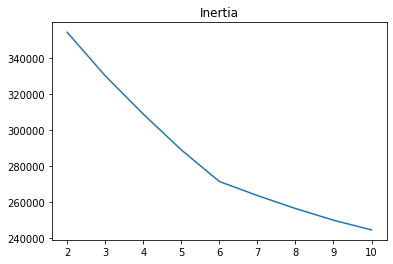

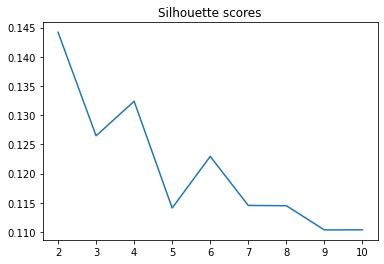

In [ ]:
# Create an empty list of inertias and silhouette
ks = range(2,11)

inertias = []
silhouette_scores = []
# Loop through ks values between 2 and 10 and store the inertias and silhouette_score in the list.
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state = 42)
  kmeans.fit(processed_df)
  # Save inertia for various cluster numbers in list
  inertias.append(kmeans.inertia_)
  # Save silhouette scores for various cluster numbers in list
  silhouette_scores.append(silhouette_score(processed_df, kmeans.labels_))
plt.title('Inertia')
plt.plot(ks, inertias)
plt.show()
plt.title('Silhouette scores')
plt.plot(ks, silhouette_scores )
plt.show()

The inertia plot does not have a very pronounced elbow, maybe 6. And cluster with 4 has higher silhouette scores after 2. I will choose 4

In [ ]:
# fit new kmeans (n_cluester = 3)
kmeans4 = KMeans(n_clusters = 4, random_state = 42)
kmeans4.fit(processed_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Save the cluster labels to the dateframe
df_copy['cluster'] = kmeans4.labels_

In [ ]:
df_copy

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,5,3,0,0,1,1,0,0,0
3,54,3,453,3,5,5,5,3,4,4,...,4,3,1,91,80,0,1,1,0,3
4,40,1,775,4,3,3,3,4,4,4,...,3,3,4,0,0,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10,2,820,5,3,2,2,5,5,4,...,5,5,5,0,0,0,1,1,1,1
19996,27,3,2676,4,3,3,3,4,4,4,...,1,4,4,0,0,0,1,1,0,2
19997,39,1,197,2,5,2,1,4,2,4,...,3,5,4,25,18,1,1,0,0,2
19998,17,3,3340,2,5,5,5,2,2,2,...,2,3,2,2,0,0,1,1,0,0


In [ ]:
# Analyzing the clusters 
df_cluster_group = df_copy.groupby('cluster')#, as_index = False).mean()
df_cluster_group

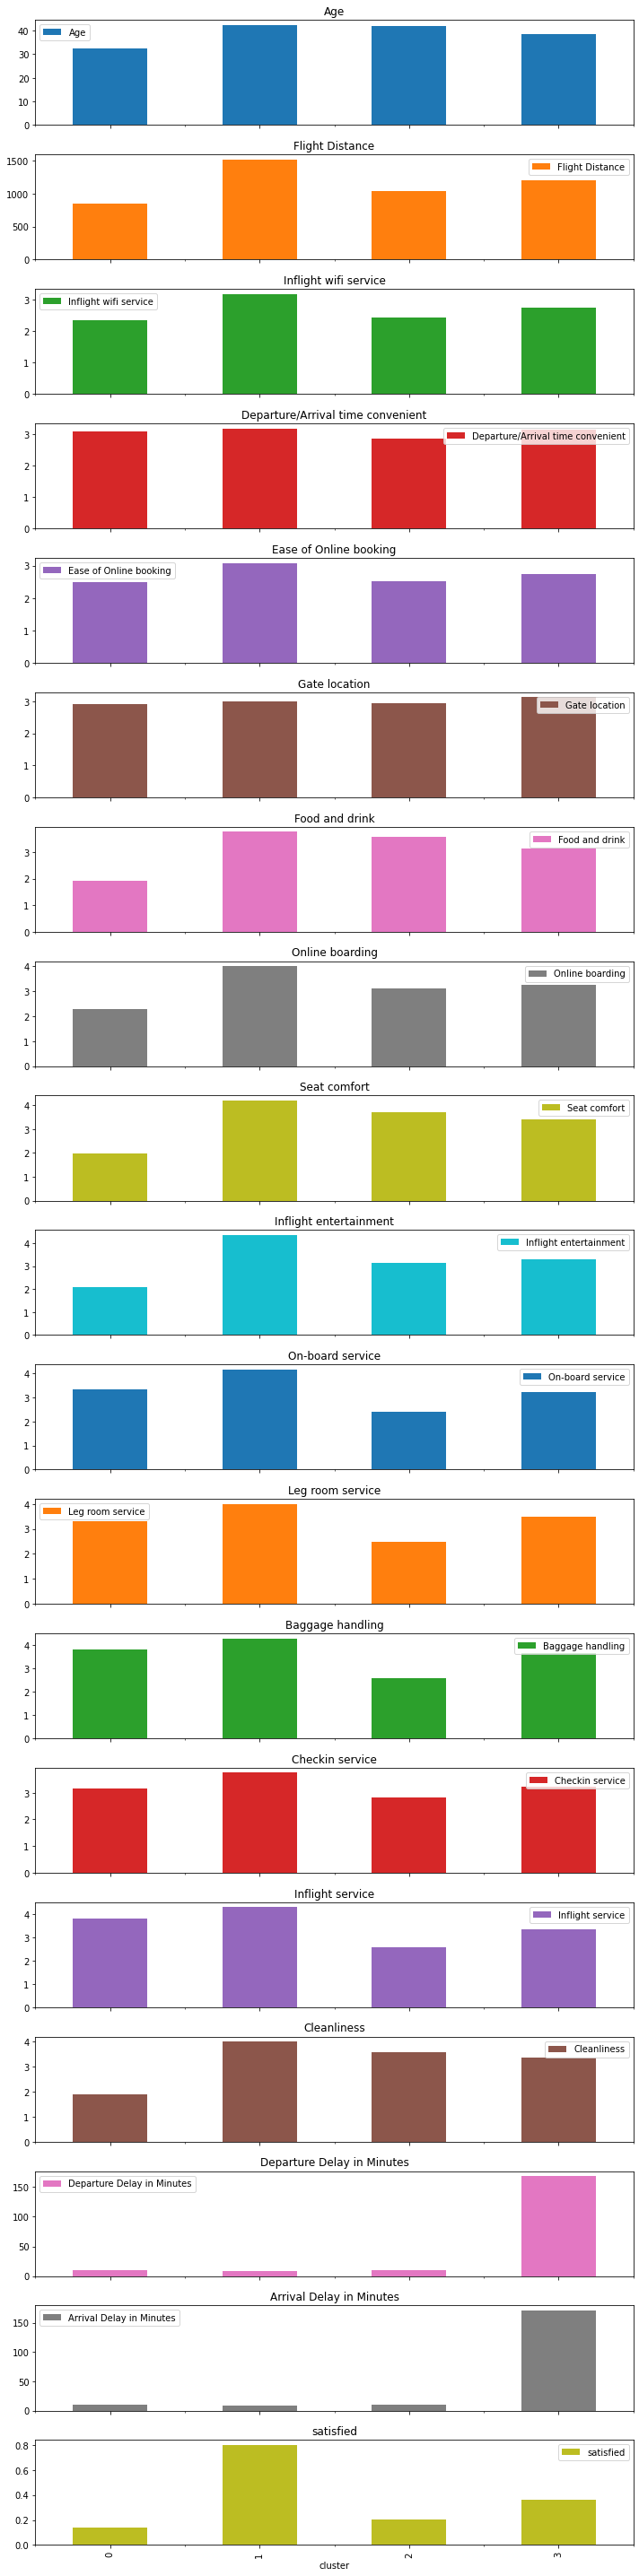

In [ ]:
# Visualize means values of each column
cluster_means = df_cluster_group.mean()
cluster_means.plot(subplots=True, kind='bar', figsize=(10,40))
plt.tight_layout()

# Investigate each of the clusters separately.

In [ ]:
# Analyzing the clusters 
df_cluster_group = df_copy.groupby('cluster', as_index = False).mean()
df_cluster_group


,cluster,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied
0,0,32.592905,849.150150,2.357545,3.084272,2.504505,2.929805,1.918356,2.281907,1.985360,2.071321,3.337650,3.312125,3.791479,3.174174,3.821697,1.901839,9.749625,10.368994,0.138138
1,1,42.287404,1517.886000,3.181415,3.173034,3.086764,3.008750,3.771999,3.998891,4.198915,4.354696,4.159108,3.999877,4.281489,3.747474,4.302687,3.984964,8.468819,8.397584,0.799236
2,2,41.921208,1041.254091,2.439177,2.863506,2.512907,2.940611,3.583432,3.111524,3.708790,3.126877,2.385861,2.482200,2.570609,2.819302,2.585625,3.554918,10.034419,10.582419,0.204657
3,3,38.515055,1202.928685,2.736926,3.123613,2.754358,3.129952,3.131537,3.263074,3.410460,3.294770,3.226624,3.491284,3.638669,3.213946,3.347068,3.353407,168.353407,170.933439,0.359746


In [ ]:
df_cluster_group1 = df_copy.groupby(['cluster', 'satisfied']).count()
df_cluster_group1

Age  Class  Flight Distance  Inflight wifi service  \
cluster satisfied                                                        
0       0          4592   4592             4592                   4592   
        1           736    736              736                    736   
1       0          1629   1629             1629                   1629   
        1          6485   6485             6485                   6485   
2       0          4714   4714             4714                   4714   
        1          1213   1213             1213                   1213   
3       0           404    404              404                    404   
        1           227    227              227                    227   

                   Departure/Arrival time convenient  Ease of Online booking  \
cluster satisfied                                                              
0       0                                       4592                    4592   
        1                                        736                     736   
1       0                                       1629                    1629   
        1                                       6485                    6485   
2       0                                       4714                    4714   
        1                                       1213                    1213   
3       0                                        404                     404   
        1                                        227                     227   

                   Gate location  Food and drink  Online boarding  \
cluster satisfied                                                   
0       0                   4592            4592             4592   
        1                    736             736              736   
1       0                   1629            1629             1629   
        1                   6485            6485             6485   
2       0                   4714            4714             4714   
        1                   1213            1213             1213   
3       0                    404             404              404   
        1                    227             227              227   

                   Seat comfort  ...  Leg room service  Baggage handling  \
cluster satisfied                ...                                       
0       0                  4592  ...              4592              4592   
        1                   736  ...               736               736   
1       0                  1629  ...              1629              1629   
        1                  6485  ...              6485              6485   
2       0                  4714  ...              4714              4714   
        1                  1213  ...              1213              1213   
3       0                   404  ...               404               404   
        1                   227  ...               227               227   

                   Checkin service  Inflight service  Cleanliness  \
cluster satisfied                                                   
0       0                     4592              4592         4592   
        1                      736               736          736   
1       0                     1629              1629         1629   
        1                     6485              6485         6485   
2       0                     4714              4714         4714   
        1                     1213              1213         1213   
3       0                      404               404          404   
        1                      227               227          227   

                   Departure Delay in Minutes  Arrival Delay in Minutes  \
cluster satisfied                                                         
0       0                                4592                      4592   
        1                                 736                       736   
1       0                          

In [ ]:
 pd.set_option('display.max_columns', None)
df_cluster_group = df_copy.groupby('cluster', as_index = False).describe(include = 'all')
df_cluster_group

Age                                                                     \
    count unique top freq       mean        std  min   25%   50%   75%   max   
0  5328.0    NaN NaN  NaN  32.592905  14.938055  7.0  22.0  30.0  42.0  79.0   
1  8114.0    NaN NaN  NaN  42.287404  13.335610  7.0  33.0  44.0  52.0  85.0   
2  5927.0    NaN NaN  NaN  41.921208  15.596618  7.0  30.0  42.0  54.0  85.0   
3   631.0    NaN NaN  NaN  38.515055  14.893570  7.0  26.0  39.0  50.0  78.0   

  Class                                                     Flight Distance  \
  count unique top  freq mean  std  min  25%  50%  75%  max           count   
0  5328      3   1  3498  NaN  NaN  NaN  NaN  NaN  NaN  NaN          5328.0   
1  8114      3   3  5920  NaN  NaN  NaN  NaN  NaN  NaN  NaN          8114.0   
2  5927      3   1  3363  NaN  NaN  NaN  NaN  NaN  NaN  NaN          5927.0   
3   631      3   1   296  NaN  NaN  NaN  NaN  NaN  NaN  NaN           631.0   

                                                                          \
  unique top freq         mean          std   min    25%     50%     75%   
0    NaN NaN  NaN   849.150150   701.211638  67.0  366.0   634.0  1062.0   
1    NaN NaN  NaN  1517.886000  1123.331659  31.0  528.0  1197.0  2380.0   
2    NaN NaN  NaN  1041.254091   911.336648  67.0  391.0   711.0  1440.0   
3    NaN NaN  NaN  1202.928685  1010.552910  73.0  448.0   859.0  1620.0   

          Inflight wifi service                                                \
      max                 count unique top freq      mean       std  min  25%   
0  4963.0                5328.0    NaN NaN  NaN  2.357545  1.154636  0.0  2.0   
1  4983.0                8114.0    NaN NaN  NaN  3.181415  1.403494  0.0  2.0   
2  4983.0                5927.0    NaN NaN  NaN  2.439177  1.178888  0.0  2.0   
3  3911.0                 631.0    NaN NaN  NaN  2.736926  1.258829  0.0  2.0   

                 Departure/Arrival time convenient                            \
   50%  75%  max                             count unique top freq      mean   
0  2.0  3.0  5.0                            5328.0    NaN NaN  NaN  3.084272   
1  3.0  4.0  5.0                            8114.0    NaN NaN  NaN  3.173034   
2  2.0  3.0  5.0                            5927.0    NaN NaN  NaN  2.863506   
3  3.0  4.0  5.0                             631.0    NaN NaN  NaN  3.123613   

                                     Ease of Online booking                  \
        std  min  25%  50%  75%  max                  count unique top freq   
0  1.583136  0.0  2.0  3.0  4.0  5.0                 5328.0    NaN NaN  NaN   
1  1.497319  0.0  2.0  3.0  4.0  5.0                 8114.0    NaN NaN  NaN   
2  1.518842  0.0  2.0  3.0  4.0  5.0                 5927.0    NaN NaN  NaN   
3  1.456435  0.0  2.0  3.0  4.0  5.0                  631.0    NaN NaN  NaN   

                                               Gate location                  \
       mean       std  min  25%  50%  75%  max         count unique top freq   
0  2.504505  1.329080  0.0  2.0  2.0  3.0  5.0        5328.0    NaN NaN  NaN   
1  3.086764  1.401911  0.0  2.0  3.0  4.0  5.0        8114.0    NaN NaN  NaN   
2  2.512907  1.359630  0.0  1.0  2.0  3.0  5.0        5927.0    NaN NaN  NaN   
3  2.754358  1.342188  0.0  2.0  3.0  4.0  5.0         631.0    NaN NaN  NaN   

                                               Food and drink                  \
       mean       std  min  25%  50%  75%  max          count unique top freq   
0  2.929805  1.214837  1.0  2.0  3.0  4.0  5.0         5328.0    NaN NaN  NaN   
1  3.008750  1.361837  1.0  2.0  3.0  4.0  5.0         8114.0    NaN NaN  NaN   
2  2.940611  1.219781  0.0  2.0  3.0  4.0  5.0         5927.0    NaN NaN  NaN   
3  3.129952  1.245528  1.0  2.0  3.0  4.0  5.0          631.0    NaN NaN  NaN   

                                               Online boarding             \
       mean       std  min  25%  50%  75%  max           count unique top   
0  1.918356  0.852946  0.0  

In [ ]:
# Use .groupby() to investigate the minimum, maximum, and mean value for each feature in each cluster.
cluster_groups = df_copy.groupby('cluster')
for col in df_copy.columns:
  print('\n', col)
  display(cluster_groups[col].describe())


 Age


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,32.592905,14.938055,7.0,22.0,30.0,42.0,79.0
1,8114.0,42.287404,13.335610,7.0,33.0,44.0,52.0,85.0
2,5927.0,41.921208,15.596618,7.0,30.0,42.0,54.0,85.0
3,631.0,38.515055,14.893570,7.0,26.0,39.0,50.0,78.0



 Class


,count,unique,top,freq
cluster,,,,
0,5328,3,1,3498
1,8114,3,3,5920
2,5927,3,1,3363
3,631,3,1,296



 Flight Distance


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,849.150150,701.211638,67.0,366.0,634.0,1062.0,4963.0
1,8114.0,1517.886000,1123.331659,31.0,528.0,1197.0,2380.0,4983.0
2,5927.0,1041.254091,911.336648,67.0,391.0,711.0,1440.0,4983.0
3,631.0,1202.928685,1010.552910,73.0,448.0,859.0,1620.0,3911.0



 Inflight wifi service


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,2.357545,1.154636,0.0,2.0,2.0,3.0,5.0
1,8114.0,3.181415,1.403494,0.0,2.0,3.0,4.0,5.0
2,5927.0,2.439177,1.178888,0.0,2.0,2.0,3.0,5.0
3,631.0,2.736926,1.258829,0.0,2.0,3.0,4.0,5.0



 Departure/Arrival time convenient


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,3.084272,1.583136,0.0,2.0,3.0,4.0,5.0
1,8114.0,3.173034,1.497319,0.0,2.0,3.0,4.0,5.0
2,5927.0,2.863506,1.518842,0.0,2.0,3.0,4.0,5.0
3,631.0,3.123613,1.456435,0.0,2.0,3.0,4.0,5.0



 Ease of Online booking


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,2.504505,1.329080,0.0,2.0,2.0,3.0,5.0
1,8114.0,3.086764,1.401911,0.0,2.0,3.0,4.0,5.0
2,5927.0,2.512907,1.359630,0.0,1.0,2.0,3.0,5.0
3,631.0,2.754358,1.342188,0.0,2.0,3.0,4.0,5.0



 Gate location


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,2.929805,1.214837,1.0,2.0,3.0,4.0,5.0
1,8114.0,3.008750,1.361837,1.0,2.0,3.0,4.0,5.0
2,5927.0,2.940611,1.219781,0.0,2.0,3.0,4.0,5.0
3,631.0,3.129952,1.245528,1.0,2.0,3.0,4.0,5.0



 Food and drink


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,1.918356,0.852946,0.0,1.0,2.0,2.0,5.0
1,8114.0,3.771999,1.137432,1.0,3.0,4.0,5.0,5.0
2,5927.0,3.583432,1.140966,0.0,3.0,4.0,4.0,5.0
3,631.0,3.131537,1.342872,0.0,2.0,3.0,4.0,5.0



 Online boarding


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,2.281907,1.183436,0.0,1.0,2.0,3.0,5.0
1,8114.0,3.998891,1.075539,0.0,4.0,4.0,5.0,5.0
2,5927.0,3.111524,1.211326,0.0,2.0,3.0,4.0,5.0
3,631.0,3.263074,1.361797,0.0,2.0,3.0,4.0,5.0



 Seat comfort


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,1.985360,0.947352,1.0,1.0,2.0,3.0,5.0
1,8114.0,4.198915,0.927745,1.0,4.0,4.0,5.0,5.0
2,5927.0,3.708790,0.987209,1.0,3.0,4.0,4.0,5.0
3,631.0,3.410460,1.328976,1.0,2.0,4.0,5.0,5.0



 Inflight entertainment


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,2.071321,0.971230,0.0,1.0,2.0,3.0,5.0
1,8114.0,4.354696,0.662904,1.0,4.0,4.0,5.0,5.0
2,5927.0,3.126877,1.218777,0.0,2.0,3.0,4.0,5.0
3,631.0,3.294770,1.236465,1.0,2.0,3.0,4.0,5.0



 On-board service


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,3.337650,1.209093,1.0,3.0,3.0,4.0,5.0
1,8114.0,4.159108,0.850721,1.0,4.0,4.0,5.0,5.0
2,5927.0,2.385861,1.099699,0.0,2.0,2.0,3.0,5.0
3,631.0,3.226624,1.293815,1.0,2.0,3.0,4.0,5.0



 Leg room service


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,3.312125,1.277371,0.0,2.0,3.0,4.0,5.0
1,8114.0,3.999877,1.008713,0.0,4.0,4.0,5.0,5.0
2,5927.0,2.482200,1.229755,0.0,2.0,2.0,3.0,5.0
3,631.0,3.491284,1.159982,0.0,3.0,4.0,4.0,5.0



 Baggage handling


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,3.791479,1.001157,1.0,3.0,4.0,5.0,5.0
1,8114.0,4.281489,0.771829,1.0,4.0,4.0,5.0,5.0
2,5927.0,2.570609,1.089498,1.0,2.0,3.0,3.0,5.0
3,631.0,3.638669,1.076160,1.0,3.0,4.0,4.0,5.0



 Checkin service


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,3.174174,1.265443,1.0,2.0,3.0,4.0,5.0
1,8114.0,3.747474,1.080945,1.0,3.0,4.0,5.0,5.0
2,5927.0,2.819302,1.261162,1.0,2.0,3.0,4.0,5.0
3,631.0,3.213946,1.373281,1.0,2.0,3.0,4.0,5.0



 Inflight service


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,3.821697,0.975446,1.0,3.0,4.0,5.0,5.0
1,8114.0,4.302687,0.770512,1.0,4.0,4.0,5.0,5.0
2,5927.0,2.585625,1.071703,0.0,2.0,3.0,3.0,5.0
3,631.0,3.347068,1.236349,1.0,3.0,4.0,4.0,5.0



 Cleanliness


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,1.901839,0.836072,0.0,1.0,2.0,2.0,5.0
1,8114.0,3.984964,0.963027,1.0,3.0,4.0,5.0,5.0
2,5927.0,3.554918,1.118967,1.0,3.0,4.0,4.0,5.0
3,631.0,3.353407,1.345298,1.0,2.0,4.0,4.5,5.0



 Departure Delay in Minutes


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,9.749625,19.021936,0.0,0.0,0.0,11.0,119.0
1,8114.0,8.468819,17.414702,0.0,0.0,0.0,8.0,113.0
2,5927.0,10.034419,19.120631,0.0,0.0,0.0,11.0,114.0
3,631.0,168.353407,84.980709,59.0,115.0,145.0,190.0,1305.0



 Arrival Delay in Minutes


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,10.368994,19.673945,0.0,0.0,0.0,12.0,129.0
1,8114.0,8.397584,17.574582,0.0,0.0,0.0,8.0,129.0
2,5927.0,10.582419,19.340020,0.0,0.0,0.0,13.0,133.0
3,631.0,170.933439,84.718387,80.0,118.0,147.0,196.0,1280.0



 Gender_Male


,count,unique,top,freq
cluster,,,,
0,5328,2,1,2867
1,8114,2,0,4068
2,5927,2,0,3341
3,631,2,0,317



 Loyal Customer


,count,unique,top,freq
cluster,,,,
0,5328,2,1,3688
1,8114,2,1,7293
2,5927,2,1,4872
3,631,2,1,504



 Business Travel


,count,unique,top,freq
cluster,,,,
0,5328,2,1,2866
1,8114,2,1,6762
2,5927,2,1,3689
3,631,2,1,441



 satisfied


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,0.138138,0.345077,0.0,0.0,0.0,0.0,1.0
1,8114.0,0.799236,0.400597,0.0,1.0,1.0,1.0,1.0
2,5927.0,0.204657,0.403485,0.0,0.0,0.0,0.0,1.0
3,631.0,0.359746,0.480307,0.0,0.0,0.0,1.0,1.0



 cluster


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5328.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8114.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,5927.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,631.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
# I will convert cluster to string to plot only numbers 0 and 1 like categorical column 
df_cluster_group['cluster'] = df_cluster_group['cluster'].astype('string')


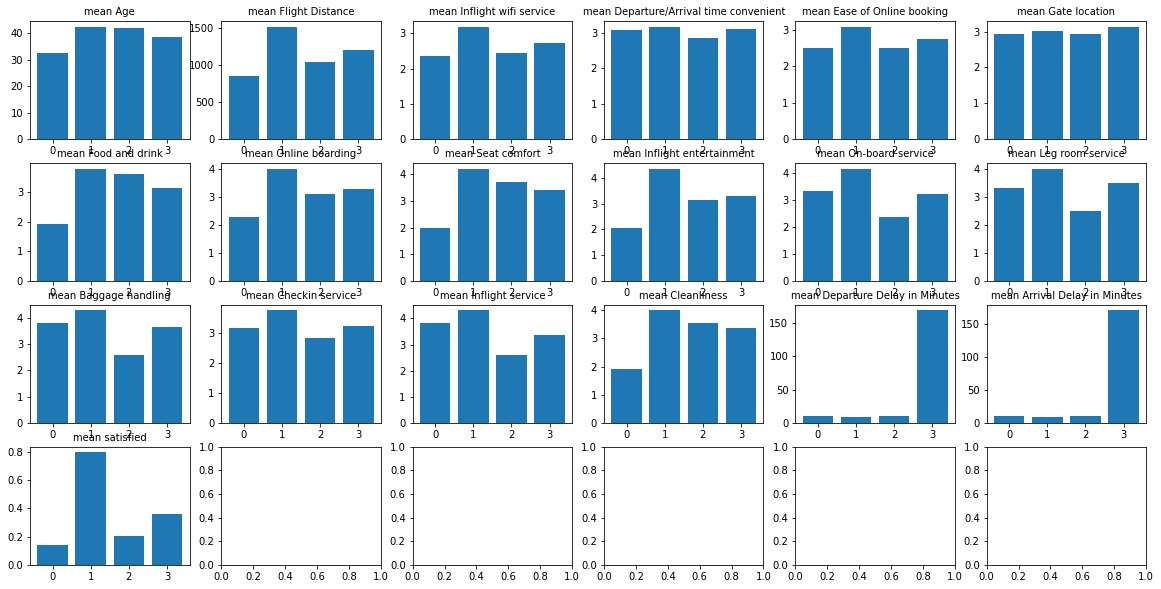

In [ ]:
# Visualize means 
df_cluster_group_means = df_copy.groupby('cluster', as_index = False).mean()
df_cluster_group_means
fig, axes = plt.subplots(4,6, figsize = (20, 10))
# fig is an array of dimensions 2,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate (df_cluster_group_means.columns[1:]):
  fig = axes[i].bar(df_cluster_group_means['cluster'], df_cluster_group_means[col])
  axes[i].set_title(f'mean {col}',  fontsize = 10)
  
 

# Machine Learning 

In [ ]:
df_copy.isna().sum()

Age                                  0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Male                          0
Loyal Customer                       0
Business Travel                      0
satisfied                            0
cluster                              0
dtype: int64

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                20000 non-null  int64 
 1   Class                              20000 non-null  object
 2   Flight Distance                    20000 non-null  int64 
 3   Inflight wifi service              20000 non-null  int64 
 4   Departure/Arrival time convenient  20000 non-null  int64 
 5   Ease of Online booking             20000 non-null  int64 
 6   Gate location                      20000 non-null  int64 
 7   Food and drink                     20000 non-null  int64 
 8   Online boarding                    20000 non-null  int64 
 9   Seat comfort                       20000 non-null  int64 
 10  Inflight entertainment             20000 non-null  int64 
 11  On-board service                   20000 non-null  int64 
 12  Leg 

## Defining X and y

In [ ]:
# matrix
X = df_copy.drop(columns=['satisfied', 'cluster'])

# target
y = df_copy['satisfied']


In [ ]:
# Check if target is balanced
df_copy['satisfied'].value_counts(normalize = True)

0    0.56695
1    0.43305
Name: satisfied, dtype: float64

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
num_selector(X_train)

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [ ]:
cat_selector(X_train)

['Class', 'Gender_Male', 'Loyal Customer', 'Business Travel']

In [ ]:
# make pipeline with Preprocessing and PCA 
pca = PCA(n_components = .95)
scaler = MinMaxScaler()
preprocessor1 = make_column_transformer((scaler, num_selector ), (ohe, cat_selector ), remainder='passthrough')

In [ ]:
pca_processing = make_pipeline(preprocessor1, pca)

In [ ]:
# fit in X_train
pca_processing.fit(X_train)
# transform both X_train and X_test
X_train_processed = pca_processing.transform(X_train)
X_test_processed = pca_processing.transform(X_test)

In [ ]:
# check 
X_train_processed.dtype

dtype('float64')

In [ ]:
np.isnan(X_train_processed).sum()

0

In [ ]:
np.isnan(X_test_processed).sum()

0

In [ ]:
X_test_processed.dtype

dtype('float64')

In [ ]:
input_dim = X_train_processed.shape[1]
input_dim

15

# model 1 

In [ ]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

Epoch 1/50
469/469 [==============================] - 3s 4ms/step - loss: 0.4620 - accuracy: 0.7827 - precision: 0.8783 - recall: 0.5804 - val_loss: 0.3199 - val_accuracy: 0.8728 - val_precision: 0.8559 - val_recall: 0.8455
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.8826 - precision: 0.8857 - recall: 0.8380 - val_loss: 0.2868 - val_accuracy: 0.8920 - val_precision: 0.8939 - val_recall: 0.8488
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2730 - accuracy: 0.8946 - precision: 0.9026 - recall: 0.8490 - val_loss: 0.2649 - val_accuracy: 0.9016 - val_precision: 0.9053 - val_recall: 0.8605
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.9004 - precision: 0.9102 - recall: 0.8552 - val_loss: 0.2513 - val_accuracy: 0.9050 - val_precision: 0.9084 - val_recall: 0.8656
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2391 - accuracy: 0.9039 - pr

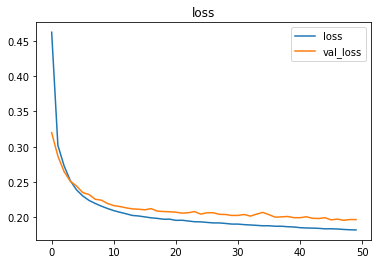

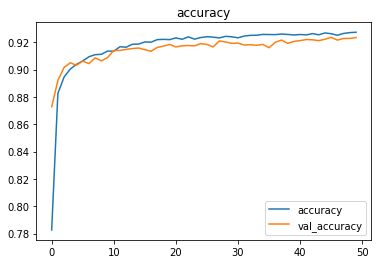

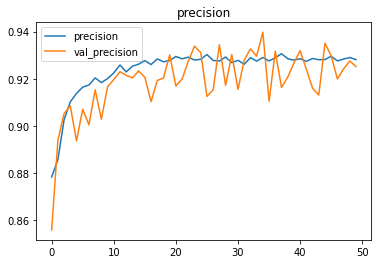

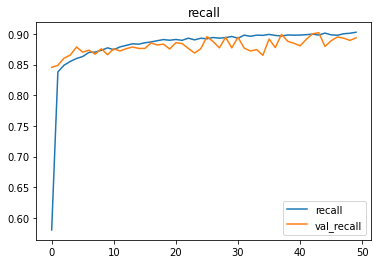

In [ ]:
# create model
model = Sequential()

model.add(Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy', metrics.Precision(), metrics.Recall()])

# fit your model
history = model.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test), 
                    epochs=50)

plot_history(history)

In [ ]:
model.predict(X_train_processed)[:5]

469/469 [==============================] - 1s 1ms/step


array([[9.9446797e-01],
       [6.6779030e-04],
       [5.1036292e-01],
       [4.7211468e-01],
       [1.0603264e-02]], dtype=float32)

In [ ]:
# Get predictions and use np.rint(pred) round them to integers instead of floats
train_preds = np.rint(model.predict(X_train_processed))
test_preds = np.rint(model.predict(X_test_processed))

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds[:5])
print(train_preds[:5])

157/157 [==============================] - 0s 1ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]]


Training Scores
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      8482
           1       0.93      0.90      0.92      6518

    accuracy                           0.93     15000
   macro avg       0.93      0.92      0.93     15000
weighted avg       0.93      0.93      0.93     15000



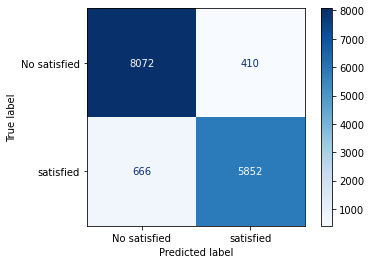



Testing Scores
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2857
           1       0.93      0.89      0.91      2143

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



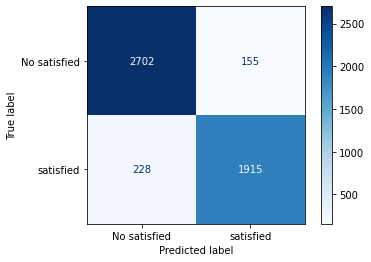

In [ ]:
# Define labels for the confusion matrix
labels = ['No satisfied', 'satisfied']

# Display train scores
print('Training Scores')

# Classification Report
print(classification_report(y_train, train_preds, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, train_preds, cmap='Blues',
                                         display_labels=labels)
plt.show()
print('\n')

# Display test scores
print('Testing Scores')

# Classification report
print(classification_report(y_test, test_preds, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',
                                         display_labels=labels)
plt.show()

# model 2 

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.4538 - accuracy: 0.7983 - precision_1: 0.7914 - recall_1: 0.7275 - val_loss: 0.3119 - val_accuracy: 0.8828 - val_precision_1: 0.9015 - val_recall_1: 0.8157
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8663 - precision_1: 0.8862 - recall_1: 0.7944 - val_loss: 0.2920 - val_accuracy: 0.8920 - val_precision_1: 0.9199 - val_recall_1: 0.8194
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8770 - precision_1: 0.9000 - recall_1: 0.8065 - val_loss: 0.2764 - val_accuracy: 0.8978 - val_precision_1: 0.9206 - val_recall_1: 0.8334
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.8896 - precision_1: 0.9057 - recall_1: 0.8326 - val_loss: 0.2602 - val_accuracy: 0.9028 - val_precision_1: 0.9195 - val_recall_1: 0.8474
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss

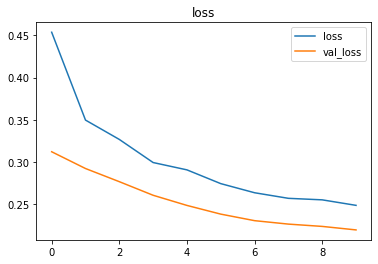

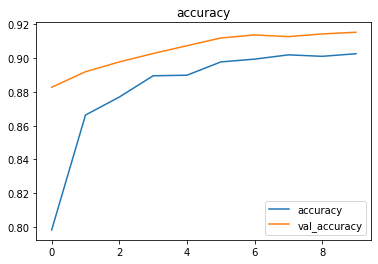

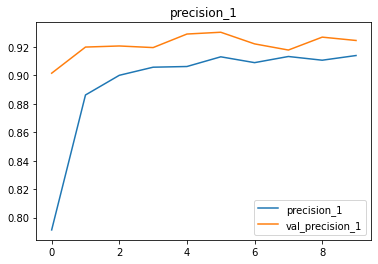

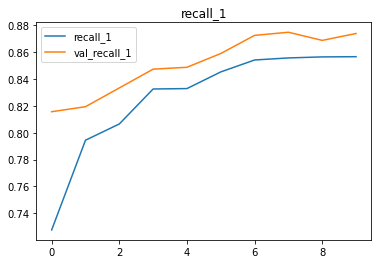

In [ ]:
# create model
model2 = Sequential()

model2.add(Dense(50, input_dim = input_dim, activation = 'relu'))
model2.add(Dropout(.5))
model2.add(Dense(25, activation = 'relu'))
model2.add(Dropout(.5))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy', metrics.Precision(), metrics.Recall()])

# fit your model
history = model2.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test), 
                    epochs=10)

plot_history(history)

In [ ]:
# Get predictions and use np.rint(pred) round them to integers instead of floats
train_preds = np.rint(model2.predict(X_train_processed))
test_preds = np.rint(model2.predict(X_test_processed))

157/157 [==============================] - 0s 1ms/step


Training Scores
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      8482
           1       0.93      0.88      0.90      6518

    accuracy                           0.92     15000
   macro avg       0.92      0.91      0.92     15000
weighted avg       0.92      0.92      0.92     15000



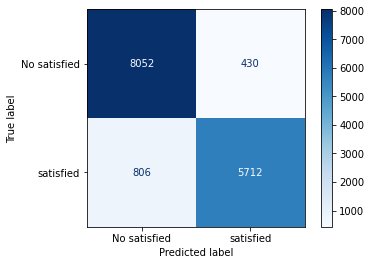



Testing Scores
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2857
           1       0.92      0.87      0.90      2143

    accuracy                           0.92      5000
   macro avg       0.92      0.91      0.91      5000
weighted avg       0.92      0.92      0.92      5000



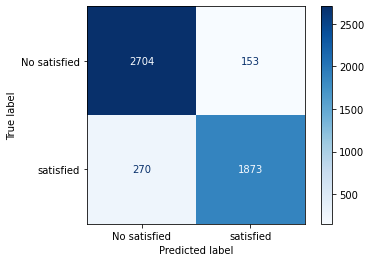

In [ ]:
# Define labels for the confusion matrix
labels = ['No satisfied', 'satisfied']

# Display train scores
print('Training Scores')

# Classification Report
print(classification_report(y_train, train_preds, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, train_preds, cmap='Blues',
                                         display_labels=labels)
plt.show()
print('\n')

# Display test scores
print('Testing Scores')

# Classification report
print(classification_report(y_test, test_preds, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',
                                         display_labels=labels)
plt.show()

# model 3 

In [ ]:
# create model
model3 = Sequential()

model3.add(Dense(100, input_dim = input_dim, activation = 'relu'))
model3.add(Dropout(.5))
model3.add(Dense(100, activation = 'relu'))
model3.add(Dropout(.5))
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy', metrics.Precision(), metrics.Recall()])

In [ ]:
# early_stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 5)

In [ ]:
# fit your model
history = model3.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test), 
                    epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.3768 - accuracy: 0.8439 - precision_2: 0.8640 - recall_2: 0.7605 - val_loss: 0.2858 - val_accuracy: 0.8954 - val_precision_2: 0.9286 - val_recall_2: 0.8189
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2983 - accuracy: 0.8841 - precision_2: 0.9041 - recall_2: 0.8202 - val_loss: 0.2473 - val_accuracy: 0.9070 - val_precision_2: 0.9229 - val_recall_2: 0.8544
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2667 - accuracy: 0.8956 - precision_2: 0.9070 - recall_2: 0.8466 - val_loss: 0.2244 - val_accuracy: 0.9132 - val_precision_2: 0.9253 - val_recall_2: 0.8675
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2431 - accuracy: 0.9034 - precision_2: 0.9065 - recall_2: 0.8671 - val_loss: 0.2161 - val_accuracy: 0.9138 - val_precision_2: 0.8974 - val_recall_2: 0.9020
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss

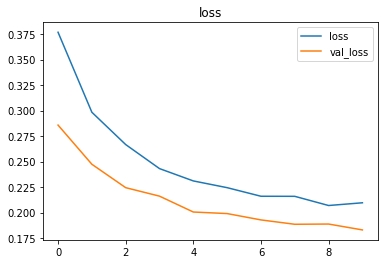

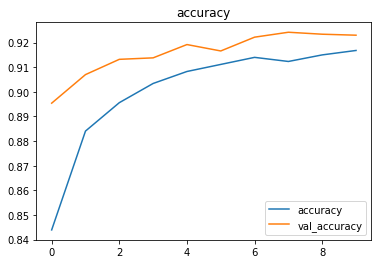

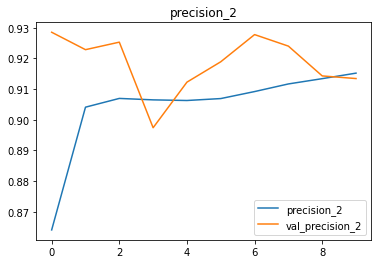

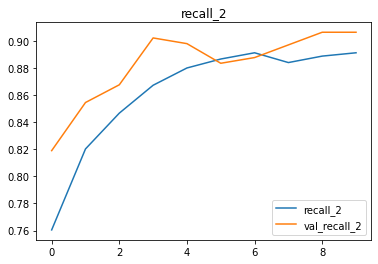

In [ ]:
plot_history(history)

In [ ]:
# Get predictions and use np.rint(pred) round them to integers instead of floats
train_preds = np.rint(model3.predict(X_train_processed))
test_preds = np.rint(model3.predict(X_test_processed))

157/157 [==============================] - 0s 1ms/step


Training Scores
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8482
           1       0.92      0.92      0.92      6518

    accuracy                           0.93     15000
   macro avg       0.93      0.93      0.93     15000
weighted avg       0.93      0.93      0.93     15000



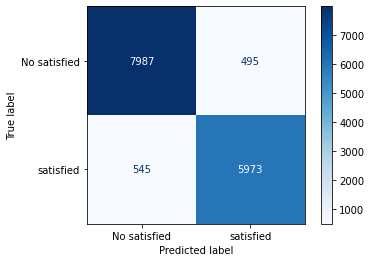



Testing Scores
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2857
           1       0.91      0.91      0.91      2143

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



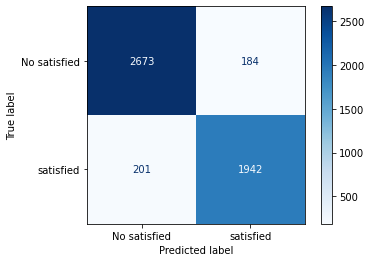

In [ ]:
# Define labels for the confusion matrix
labels = ['No satisfied', 'satisfied']

# Display train scores
print('Training Scores')

# Classification Report
print(classification_report(y_train, train_preds, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, train_preds, cmap='Blues',
                                         display_labels=labels)
plt.show()
print('\n')

# Display test scores
print('Testing Scores')

# Classification report
print(classification_report(y_test, test_preds, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',
                                         display_labels=labels)
plt.show()